# **Restaurant Recommender System**

##### **Group 1 (i.e. Foodies) members**:
<ul type='square'> 
    <li> David Mwiti</li>
    <li> Karen Amanya</li>
    <li> Mercy Onduso </li>
    <li> Nicholus Magak </li>
    <li> Penina Wanyama </li>
    <li> Stephen Thuo </li>
</ul>

# Business Understanding

## **Overview**

### **Problem Statement**
The current lack of personalized recommendations based on explicit feedback on restaurant recommendation platforms is resulting in decreased visits and revenue. Traditional approaches based on cuisine or ratings are no longer sufficient as customers prefer personal recommendations from friends and influencers, as they provide more informative and reliable reviews. 

To address this challenge, a content recommender system that incorporates explicit feedback and relevant keywords can provide a more personalized experience and deliver relevant recommendations, ultimately improving website traffic and revenue for restaurant platforms. This presents a unique opportunity for platforms like EatOut to gain a competitive advantage by enhancing their recommendations to enable users to easily find restaurants and hotels based on their desired experience, rather than just cuisine or ratings.


### **Objectives**

> **General Objective:**

The General objective for this project is to develop a personalized recommender system that will analyze customer preferences and recommend the most suitable restaurants on EatOut, with the goal of increasing customer satisfaction, engagement rates, and revenue.


> **Specific Objectives:**

1. Develop a user-friendly interface that allows customers to easily input their preferences for cuisine type, price range, and location.
2. Implement a collaborative filtering algorithm that can analyze customer data and generate personalized restaurant recommendations based on their preferences.
3. Integrate the recommender system with the restaurant platform and display personalized recommendations to customers as part of their overall platform experience.

> **Research Questions:**

1. What data sources should be used to train the recommendation engine, and how can this data be effectively processed and analyzed to identify patterns in customer preferences?
2. What features should be included in the user interface to allow customers to input their preferences easily and efficiently?
3. What algorithms should be implemented on customer data to generate personalized restaurant recommendations based on their preferences?
4. What are the technical requirements for integrating the recommender system with the restaurant platform, and how can the system be seamlessly integrated into the overall platform experience for customers?


### **Success Criteria**

As the aim of the project is to add a personalized experience to the website, the project’s success will be measured based on its ability to provide fast and relevant recommendations according to key words in a person’s search.

The success criteria we will follow depends on the predictive accuracy of the recommendations. This means we will rate how close the estimated ratings are to genuine use ratings, which is a measure used for evaluating non-binary ratings (e.g. 1-10 scale). Since selling books is crucial for a platform that is in business, this is the best metric we decided to use.

The two metrics that we will use are Mean Squared Error (M.S.E) and Root Mean Squared Error (R.M.S.E) due to the fact the rating scale is the same throughout.

## **Importing the required libraries**

In [4]:
# install required libraries
# ! pip install dataprep
# ! pip install pycountry
# ! pip install surprise
# ! pip install sidetable
! pip install wordcloud


  Using cached wordcloud-1.8.2.2.tar.gz (220 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for wordcloud: started
  Running setup.py install for wordcloud: finished with status 'error'


  DEPRECATION: wordcloud is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  error: subprocess-exited-with-error
  
  Running setup.py install for wordcloud did not run successfully.
  exit code: 1
  
  [22 lines of output]
  running install
  C:\Users\user\Desktop\flask\Lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
    warnings.warn(
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\color_from_image.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\tokenization.py -

In [5]:
import pandas as pd
import numpy as np
import string

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config inlineBackend.figure_format = 'retina'
sns.set_context('notebook')

# from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

import folium

from ast import literal_eval
# from dataprep.clean import clean_country #pip install dataprep
# import pycountry #conda install -c conda-forge pycountry
# from surprise import Reader, Dataset, SVD, accuracy
# from surprise.model_selection import cross_validate
# from surprise.model_selection import train_test_split
import sidetable
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import operator


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

# download nltk packages
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## **Loading the Data**

### **Restaurants_df**

In [6]:
restaurant_df = pd.read_csv('https://raw.githubusercontent.com/ThuoM/Restaurant-Recommender-System/base_modeling/restaurant_data.csv', encoding='utf-8', on_bad_lines='skip', low_memory=False)
restaurant_df.head()

,Name,Rating,Pricing,URL,Latitude,Longitude,Transactions,Location,Phone,Display Phone,Distance,Reviews,Review Count,Cuisine,Restaurant ID,Number of Reviews
0,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.995970,"['delivery', 'pickup', 'restaurant_reservation']","35 W 13th St, New York, NY 10011",1.212367e+10,(212) 367-1979,3526.365252,[{'text': 'This small and crowded place seems ...,3,"I, t, a, l, i, a, n",hdiuRS9sVZSMReZm4oV5SA,1851
1,LoveMama,5,$$,https://www.yelp.com/biz/lovemama-new-york?adj...,40.730409,-73.986127,"['delivery', 'pickup', 'restaurant_reservation']","174 2nd Ave, New York, NY 10003",1.212255e+10,(212) 254-5370,2645.074283,[{'text': 'Absolutely LOVED LoveMama!! As a co...,3,"T, h, a, i",jjJc_CrkB2HodEinB6cWww,6377
2,Ye's Apothecary,5,$$$,https://www.yelp.com/biz/yes-apothecary-new-yo...,40.719450,-73.989800,[],"119 Orchard St, New York, NY 10002",NaN,NaN,1638.756115,[{'text': 'Edy and Josh are the BEST bartender...,3,"S, z, e, c, h, u, a, n",8YWLuLUKj0t_0_Xv06UUtw,212
3,Joe's Shanghai,4,$$,https://www.yelp.com/biz/joes-shanghai-new-yor...,40.715661,-73.996701,"['delivery', 'pickup']","46 Bowery St, New York, NY 10013",1.212234e+10,(212) 233-8888,1766.176007,[{'text': 'This is the third stop of our food ...,3,"S, h, a, n, g, h, a, i, n, e, s, e",0CjK3esfpFcxIopebzjFxA,7098
4,Antidote,4,$$,https://www.yelp.com/biz/antidote-brooklyn-2?a...,40.714253,-73.965448,"['delivery', 'pickup']","66 S 2nd St, Brooklyn, NY 11249",1.718782e+10,(718) 782-2585,1376.494330,[{'text': 'Excellent service & food! The drink...,3,"C, o, c, k, t, a, i, l, , B, a, r, s",4DInnPhOyvXFbYpUdO0SMQ,325


## **Users_df**

In [7]:
data_url = 'https://raw.githubusercontent.com/ThuoM/Restaurant-Recommender-System/main/final_revs.csv'
user_revs_df = pd.read_csv(data_url)
columns=['User_Name','Account','Location','Date_of_review','Rating','Comment','URL']
user_revs_df.columns = columns
user_revs_df.head()

,User_Name,Account,Location,Date_of_review,Rating,Comment,URL
0,Elisa H.,/user_details?userid=ExhcUTTcj_MBhZdFQT9KYg,"Brooklyn, NY",1/6/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...
1,Morlene C.,/user_details?userid=VLTBPUrbNRR-f84h-altQw,"Brooklyn, NY",12/15/2022,3.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...
2,Ruwan J.,/user_details?userid=xBVo8v0mw64nk6K-pYgI6A,"New York, NY",3/23/2023,4.0,Urbanspace Union Square is a newish addition-...,https://www.yelp.com/biz/urbanspace-union-squa...
3,Mike C.,/user_details?userid=37cpUoM8hlkSQfReIEBd-Q,"Forest Hills, NY",12/14/2022,5.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...
4,Brad M.,/user_details?userid=IMD57wrCtAPbvBSAlI2nkA,"Princeton, NJ",1/10/2023,5.0,Great venue. The various vendors have amazing ...,https://www.yelp.com/biz/urbanspace-union-squa...


# **Data Understanding**

The data being used on this project was object after scraping on Yelp. It is meant to be used as a mockup for how Eat Out's data could look like on the probability our recommender is accepted.

The data contained two files: 

* **_restaurants.csv_**

Contained the restaurants we desired to recommend. A few notable features in the dataset are name(of restaurant), avg_rating, pricing_range, & cuisine. Regional data we have is from New York hence there is a location field with the restaurants' individual locs.

* **_final_revs.csv_**

Contained user info from the individual restaurants. Users have identification  based on their account links. Other features include (Username, date of review, individual rating). We were also able to acquire comments from users which can be used to give restaurants more context. 


##### _**1. restaurants_df**_

In [8]:
restaurant_df.info()

# Observations:
#   16 columns & 500 rows
#   It has some missing phone & display phone numbers
#   Missing quite a bit of data on the pricing section

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               500 non-null    object 
 1   Rating             500 non-null    int64  
 2   Pricing            315 non-null    object 
 3   URL                500 non-null    object 
 4   Latitude           500 non-null    float64
 5   Longitude          500 non-null    float64
 6   Transactions       500 non-null    object 
 7   Location           500 non-null    object 
 8   Phone              430 non-null    float64
 9   Display Phone      430 non-null    object 
 10  Distance           500 non-null    float64
 11  Reviews            500 non-null    object 
 12  Review Count       500 non-null    int64  
 13  Cuisine            500 non-null    object 
 14  Restaurant ID      500 non-null    object 
 15  Number of Reviews  500 non-null    int64  
dtypes: float64(4), int64(3), o

In [9]:
# Converting the cuisine text to a more human readable format
restaurant_df['Cuisine'] = restaurant_df['Cuisine'].map(lambda x: x.replace(',',''))
restaurant_df['Cuisine'] = restaurant_df['Cuisine'].apply(lambda x: x.replace(" ", ""))

In [10]:
# viewing the types of cuisines 
set(restaurant_df['Cuisine'])

restaurant_df['Cuisine'].head(10)

0          Italian
1             Thai
2         Szechuan
3     Shanghainese
4     CocktailBars
5         Japanese
6        FoodCourt
7         Japanese
8    American(New)
9    Mediterranean
Name: Cuisine, dtype: object

In [11]:
# viewing the number of unique restaurants
len(restaurant_df['Restaurant ID'].unique())

435

In [12]:
# Types of transactions occuring in the restaurants
set(restaurant_df['Transactions'])

{"['delivery', 'pickup', 'restaurant_reservation']",
 "['delivery', 'pickup']",
 "['delivery']",
 "['pickup', 'delivery', 'restaurant_reservation']",
 "['pickup', 'delivery']",
 "['pickup', 'restaurant_reservation', 'delivery']",
 "['restaurant_reservation', 'delivery', 'pickup']",
 "['restaurant_reservation', 'delivery']",
 "['restaurant_reservation']",
 '[]'}

In [13]:
# Preview the locations
restaurant_df['Location'].head(10)

0      35 W 13th St, New York, NY 10011
1       174 2nd Ave, New York, NY 10003
2    119 Orchard St, New York, NY 10002
3      46 Bowery St, New York, NY 10013
4       66 S 2nd St, Brooklyn, NY 11249
5      342 E 6th St, New York, NY 10003
6       55 Water St, Brooklyn, NY 11201
7      108 E 4th St, New York, NY 10003
8      205 E 4th St, New York, NY 10009
9      30 E 13th St, New York, NY 10003
Name: Location, dtype: object

In [14]:
# viewing the rating scale of the restaurants
set(restaurant_df['Rating'])

{1, 2, 3, 4, 5}

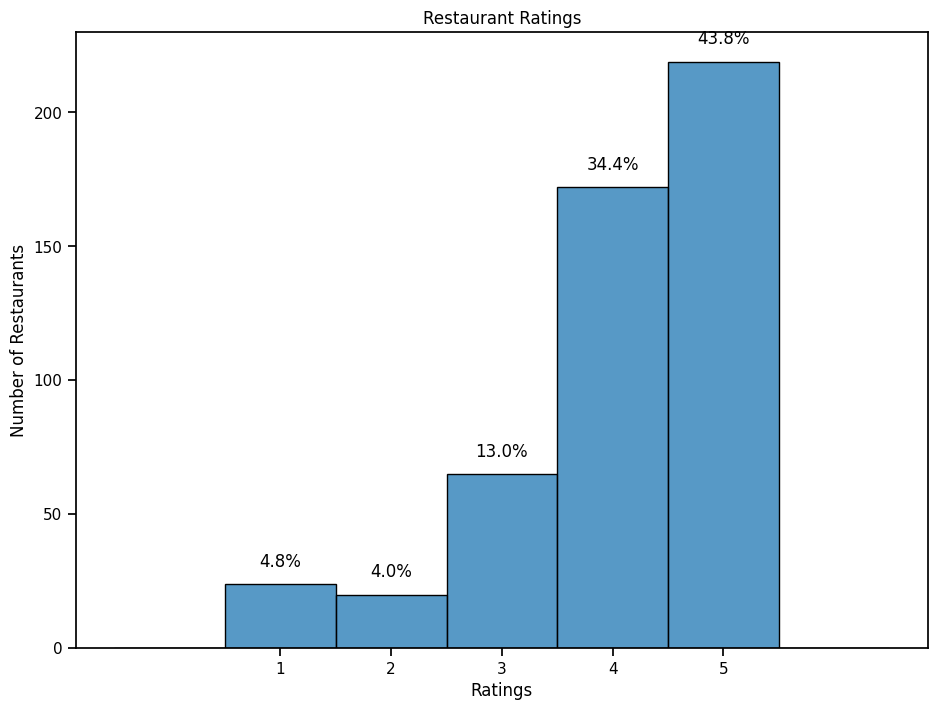

In [15]:
fig, ax = plt.subplots(figsize=(11,8))
sns.histplot(restaurant_df['Rating'], bins = np.arange(8) - 0.5, ax=ax)
ax.set_xticks(range(1,6))
ax.set_xlabel('Ratings')
ax.set_ylabel('Number of Restaurants')
ax.set_title('Restaurant Ratings');

rating_count = restaurant_df['Rating'].value_counts().sort_index()
for i, val in enumerate(rating_count.values):
    ax.text(i+1, val+5, (f'{round((val/sum(rating_count.values))*100, 1)}%'), ha='center', va='bottom',size=12)  
    
    # Observations:
    # The book rating ranges from 0 to 10
    # Most books have a rating of 0
    # The ratings between 1-4 have very few books

##### _**2. users_df**_

In [16]:
user_revs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188714 entries, 0 to 188713
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   User_Name       188714 non-null  object 
 1   Account         188714 non-null  object 
 2   Location        188714 non-null  object 
 3   Date_of_review  188714 non-null  object 
 4   Rating          188714 non-null  float64
 5   Comment         188714 non-null  object 
 6   URL             188714 non-null  object 
dtypes: float64(1), object(6)
memory usage: 10.1+ MB


In [17]:
# Checking how many unique users rated
len(user_revs_df['Account'].unique())

90324

In [18]:
user_revs_df.describe()

,Rating
count,188714.000000
mean,4.175753
std,1.132427
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [19]:
# # List of locations to users majority
# list_of_locs = set(user_revs_df['Location'])
# dic_loc = {}

# for location in list_of_locs:
#     num = len(user_revs_df[user_revs_df['Location'] == location])
#     dic_loc[location] = num
# dic_loc

**Checking for the trend in restaurant ratings production over time**

In [20]:
dic_years = {}
for years in user_revs_df['Date_of_review']:
    if int(years[-4:]) in dic_years.keys():
        dic_years[int(years[-4:])] += 1
    else:
        dic_years[int(years[-4:])] = 1
list(dic_years.keys())

[2023,
 2022,
 2021,
 2020,
 2019,
 2018,
 2016,
 2017,
 2015,
 2014,
 2013,
 2011,
 2012,
 2010,
 2008,
 2009,
 2007,
 2005,
 2006]

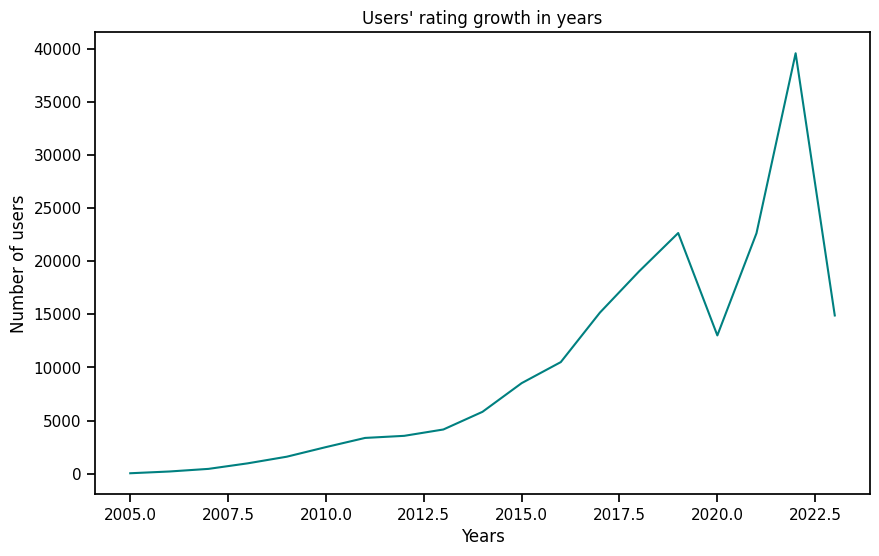

In [21]:
# years and comments trend made
myKeys = list(dic_years.keys())
myKeys.sort()

X = myKeys
y = []
for i in myKeys:
    y.append(dic_years[i]) 

year_plot = pd.DataFrame()
year_plot['years'] = X
year_plot['numbers'] = y

plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='years', y='numbers', data=year_plot, color='teal')

ax.set(xlabel='Years', ylabel='Number of users', 
       title='Users\' rating growth in years')
plt.show()
# Observations:
    # Over time, there has been an increasing trend in people embracing rating restaurants on Yelp as a means of sharing their experiences and opinions with others.

Conclusion: The amount of data retrieved over the years since 2005-2023 has been increasing exponentially over the years except for 2020 when there was a lock down. 2023 has merely reached its 1st quarter when we scraped the data

###Merging the 2 Datasets

In [22]:
#merge the two datasets
user_restaurant_df = pd.merge(user_revs_df, restaurant_df, on='URL', how='left')
user_restaurant_df.head(3)

,User_Name,Account,Location_x,Date_of_review,Rating_x,Comment,URL,Name,Rating_y,Pricing,...,Transactions,Location_y,Phone,Display Phone,Distance,Reviews,Review Count,Cuisine,Restaurant ID,Number of Reviews
0,Elisa H.,/user_details?userid=ExhcUTTcj_MBhZdFQT9KYg,"Brooklyn, NY",1/6/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,Urbanspace Union Square,3.0,NaN,...,[],"124 E 14th St, New York, NY 10003",1.716466e+10,(716) 466-2713,3040.701171,[{'text': 'Yet another food hall opens up. The...,3.0,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0
1,Morlene C.,/user_details?userid=VLTBPUrbNRR-f84h-altQw,"Brooklyn, NY",12/15/2022,3.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,Urbanspace Union Square,3.0,NaN,...,[],"124 E 14th St, New York, NY 10003",1.716466e+10,(716) 466-2713,3040.701171,[{'text': 'Yet another food hall opens up. The...,3.0,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0
2,Ruwan J.,/user_details?userid=xBVo8v0mw64nk6K-pYgI6A,"New York, NY",3/23/2023,4.0,Urbanspace Union Square is a newish addition-...,https://www.yelp.com/biz/urbanspace-union-squa...,Urbanspace Union Square,3.0,NaN,...,[],"124 E 14th St, New York, NY 10003",1.716466e+10,(716) 466-2713,3040.701171,[{'text': 'Yet another food hall opens up. The...,3.0,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0


In [23]:
user_restaurant_df.columns

Index(['User_Name', 'Account', 'Location_x', 'Date_of_review', 'Rating_x',
       'Comment', 'URL', 'Name', 'Rating_y', 'Pricing', 'Latitude',
       'Longitude', 'Transactions', 'Location_y', 'Phone', 'Display Phone',
       'Distance', 'Reviews', 'Review Count', 'Cuisine', 'Restaurant ID',
       'Number of Reviews'],
      dtype='object')

The 'Account' Column is the unique identifier for the users,
'Location_x' is the location of the restaurant where the users dined. The 'Date_of_review' column is when the user made the reviews for the restaurant. The 'Rating_x' is the ratings by user. The 'Comment' is the various comments by the user. The 'URL' is the unique identifier of the restaurant. 'Rating_y' is the average ratings the rstaurant received from the various users. 'Pricing' is used to identify the various levels of the restaurant(high-end, middle-class, affordable, cheap). The 'Transactions" is used to specify which services are offfered by the restaurant. 'Location_y' is the restaurant's location. 'Reviews' column is the various reviews the restaurant received

In [24]:
# renaming columns
user_restaurant_df.rename(columns={'Account': 'user_ID', 'Rating_x': 'user_rating', 'Rating_y': 'avg_restaurant_rating',
                                    'Cuisine': 'cuisine', 'Pricing': 'pricing', 
                                    'URL': 'url', 'Location_x': 'location', 
                                    'Restaurant ID': 'id', 'Date_of_review': 'review_date', 
                                    'Transactions': 'transactions', 'Number of Reviews':'number_of_reviews',
                                   'Comment': 'comments', 'Reviews': 'reviews'}, inplace=True)

## Data Cleaning

In [25]:
#Drop unnecessary columns
unnecessary_columns = ['User_Name', 'Name', 'Phone', 'Display Phone', 'Distance', 'Location_y',
                       'Review Count']
user_restaurant_df = user_restaurant_df.drop(unnecessary_columns, axis =1)
user_restaurant_df.head(3)

,user_ID,location,review_date,user_rating,comments,url,avg_restaurant_rating,pricing,Latitude,Longitude,transactions,reviews,cuisine,id,number_of_reviews
0,/user_details?userid=ExhcUTTcj_MBhZdFQT9KYg,"Brooklyn, NY",1/6/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,NaN,40.733618,-73.988511,[],[{'text': 'Yet another food hall opens up. The...,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0
1,/user_details?userid=VLTBPUrbNRR-f84h-altQw,"Brooklyn, NY",12/15/2022,3.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,NaN,40.733618,-73.988511,[],[{'text': 'Yet another food hall opens up. The...,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0
2,/user_details?userid=xBVo8v0mw64nk6K-pYgI6A,"New York, NY",3/23/2023,4.0,Urbanspace Union Square is a newish addition-...,https://www.yelp.com/biz/urbanspace-union-squa...,3.0,NaN,40.733618,-73.988511,[],[{'text': 'Yet another food hall opens up. The...,FoodCourt,JjomQ2VCojutXJQeGVt-QA,13.0


### **Handling Missing Values**

In [26]:
user_restaurant_df.stb.missing()

,missing,total,percent
pricing,57210,204502,27.975277
avg_restaurant_rating,42057,204502,20.565569
Latitude,42057,204502,20.565569
Longitude,42057,204502,20.565569
transactions,42057,204502,20.565569
reviews,42057,204502,20.565569
cuisine,42057,204502,20.565569
id,42057,204502,20.565569
number_of_reviews,42057,204502,20.565569
user_ID,0,204502,0.000000


From the table above, we can see the missing values in the various columns: Pricing has missing values at 27.97%, while transactions, reviews ,avg_restaurant_rating and cuisine and ID have missing values at 20.56%, The pricing col is categorical, and the missing values can be replaced by the mode. The other columns with missing values can be either be dropped or replaced

In [27]:
# Since pricing categorical data, we can use mode
user_restaurant_df['pricing'] = user_restaurant_df['pricing'].fillna(user_restaurant_df['pricing'].mode()[0])
# Empty transactions filled with None
user_restaurant_df['transactions'] = user_restaurant_df['transactions'].fillna(user_restaurant_df['transactions'].mode()[0])
# Missing Cuisines filled with a random one
user_restaurant_df['cuisine'] = user_restaurant_df['cuisine'].fillna('random')
# Missing average rating filled with the mode
user_restaurant_df['avg_restaurant_rating'] = user_restaurant_df['avg_restaurant_rating'].fillna(user_restaurant_df['avg_restaurant_rating'].mode()[0])
# Missing review filled with no reviews
user_restaurant_df['reviews'] = user_restaurant_df['reviews'].fillna('no reviews')
# Missing id filled with no identifier
user_restaurant_df['id'] = user_restaurant_df['id'].fillna('no identifier')

In [28]:
user_restaurant_df.stb.missing()

,missing,total,percent
Latitude,42057,204502,20.565569
Longitude,42057,204502,20.565569
number_of_reviews,42057,204502,20.565569
user_ID,0,204502,0.000000
location,0,204502,0.000000
review_date,0,204502,0.000000
user_rating,0,204502,0.000000
comments,0,204502,0.000000
url,0,204502,0.000000
avg_restaurant_rating,0,204502,0.000000


Encoding the pricing column

In [29]:
user_restaurant_df['pricing'].nunique()

4

In [30]:
# from sklearn.preprocessing import OrdinalEncoder

# # create an instance of the encoder
# encoder = OrdinalEncoder(categories=[['$', '$$', '$$$', '$$$$']])

# # fit and transform the pricing column
# encoded_pricing = encoder.fit_transform(user_restaurant_df['pricing'].values.reshape(-1, 1))

# # replace the original pricing column with the encoded values
# user_restaurant_df['pricing'] = encoded_pricing.astype(int)

In [31]:
user_restaurant_df['pricing'].head()

0    $$
1    $$
2    $$
3    $$
4    $$
Name: pricing, dtype: object

In [32]:
user_restaurant_df.dtypes

user_ID                   object
location                  object
review_date               object
user_rating              float64
comments                  object
url                       object
avg_restaurant_rating    float64
pricing                   object
Latitude                 float64
Longitude                float64
transactions              object
reviews                   object
cuisine                   object
id                        object
number_of_reviews        float64
dtype: object

# **Exploratory Data Analysis**

## **Data transformation**

### **Preprocess text data**

In [33]:
# Converting the columns to lower case
user_restaurant_df['url'] = user_restaurant_df['url'].str.lower()
user_restaurant_df['location'] = user_restaurant_df['location'].str.lower()
user_restaurant_df['cuisine'] = user_restaurant_df['cuisine'].str.lower()
user_restaurant_df['comments'] = user_restaurant_df['comments'].str.lower()

user_restaurant_df.sample(5)

,user_ID,location,review_date,user_rating,comments,url,avg_restaurant_rating,pricing,Latitude,Longitude,transactions,reviews,cuisine,id,number_of_reviews
33289,/user_details?userid=z9xBcjl-ghjwvDBTtiRgKg,"san diego, ca",5/3/2019,2.0,no comment,https://www.yelp.com/biz/jacobs-pickles-new-yo...,4.0,$$,40.786650,-73.975528,"['pickup', 'delivery']",[{'text': 'This is a bang for your buck spot. ...,comfortfood,xt4sa64WOrpJvZBDPNPNYg,5216.0
10427,/user_details?userid=dMbMRfmX5AApq-9ZvWjdrA,"brooklyn, ny",12/14/2011,4.0,no comment,https://www.yelp.com/biz/abc-kitchen-new-york?...,5.0,$$$,40.737750,-73.989634,['delivery'],[{'text': 'Came in shortly after 12:30pm for a...,breakfast&brunch,dMhRafXdr765DHe0k-QfaQ,3165.0
20588,/user_details?userid=-t1ELS3wtVwpFHozbvNTpQ,"tampa, fl",1/11/2020,3.0,the food was better than average. the service ...,https://www.yelp.com/biz/tuk-tuk-long-island-c...,4.0,$$,40.743232,-73.954254,"['pickup', 'delivery']",[{'text': 'The walls were decorated with some ...,thai,f7jZvRH-h76F4emzvKytaQ,762.0
44189,/user_details?userid=_MU-girKKnf0T9cRHC7-yA,"jersey city, nj",10/25/2019,5.0,ordered the avocado massa and pad see ew with ...,https://www.yelp.com/biz/thep-thai-restaurant-...,5.0,$$,40.770780,-73.957270,"['pickup', 'delivery']",[{'text': 'Super cute for date night. So yummy...,thai,O1fUmxt3kbV-rnyjBtzAfw,2555.0
43234,/user_details?userid=ZUkdGVDL08U5i17vrY080g,"bronx, ny",2/26/2019,4.0,no comment,https://www.yelp.com/biz/thep-thai-restaurant-...,5.0,$$,40.770780,-73.957270,"['pickup', 'delivery']",[{'text': 'Super cute for date night. So yummy...,thai,O1fUmxt3kbV-rnyjBtzAfw,2555.0


In [34]:
# converts the strings to python list
user_restaurant_df['transactions'] = user_restaurant_df['transactions'].apply(lambda x: literal_eval(x))

# joins the created python lists together
user_restaurant_df['transactions'] = user_restaurant_df['transactions'].apply(lambda x: ', '.join(x))

In [35]:
user_restaurant_df['transactions'].sample(10)

69483                     
124729    delivery, pickup
73798     pickup, delivery
95461     delivery, pickup
103090    delivery, pickup
31140             delivery
96048     delivery, pickup
142713    delivery, pickup
135453    delivery, pickup
139504    delivery, pickup
Name: transactions, dtype: object

<p> We chose to use NLTK word Lemmatizer and also remove English stop words and non alphabet tokens from reviews and style attributes. </p>

In [36]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def process_sentences(text):
    temp_sent =[]

    # Tokenize words
    words = nltk.word_tokenize(text)

    # Lemmatize each of the words based on their position in the sentence
    tags = nltk.pos_tag(words)
    for i, word in enumerate(words):
        # only verbs
        if tags[i][1] in ('VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'):
            lemmatized = lemmatizer.lemmatize(word, 'v')
        else:
            lemmatized = lemmatizer.lemmatize(word)
        
        # Remove stop words and non alphabet tokens
        if lemmatized not in stop_words and lemmatized.isalpha(): 
            temp_sent.append(lemmatized)

    # Some other clean-up
    full_sentence = ' '.join(temp_sent)
    full_sentence = full_sentence.replace("n't", " not")
    full_sentence = full_sentence.replace("'m", " am")
    full_sentence = full_sentence.replace("'s", " is")
    full_sentence = full_sentence.replace("'re", " are")
    full_sentence = full_sentence.replace("'ll", " will")
    full_sentence = full_sentence.replace("'ve", " have")
    full_sentence = full_sentence.replace("'d", " would")
    return full_sentence

In [37]:
# creation of filtered comments
user_restaurant_df['processed_comments'] = user_restaurant_df['comments'].apply(process_sentences)

In [38]:
# creation of filtered cuisines
user_restaurant_df['processed_cuisine'] = user_restaurant_df['cuisine'].apply(process_sentences)

In [39]:
# creation of filtered transactions
user_restaurant_df['processed_transactions'] = user_restaurant_df['transactions'].apply(process_sentences)

In [40]:
# Preview of the processed columns
user_restaurant_df[['processed_comments', 'comments', 'processed_cuisine', 'cuisine', 'processed_transactions', 'transactions']].sample(5)

,processed_comments,comments,processed_cuisine,cuisine,processed_transactions,transactions
126134,kuun time various craving kimbap yukgaejang bo...,i've had kuun a few times now for various crav...,random,random,delivery pickup,"delivery, pickup"
51789,yes everyone locavore trend place exception wa...,"yes, everyone is on the locavore trend. this ...",american new,american(new),delivery pickup,"delivery, pickup"
93879,comment,no comment,mexican,mexican,delivery pickup,"delivery, pickup"
73315,love place small cute come birthday friday aro...,love this place. it's small but cute! came her...,japanese,japanese,delivery pickup,"delivery, pickup"
161653,comment,no comment,random,random,delivery pickup,"delivery, pickup"


<p>Eventually, let's create a bag_of_words with a combination of our new preprocessed attributes:</p>
<br>

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; <strong>bag of words=style processed+reviews processed</strong>

In [41]:
user_restaurant_df['bogs'] = user_restaurant_df['processed_cuisine'] + ' ' + user_restaurant_df['processed_comments'] + ' ' + user_restaurant_df['processed_transactions']
display('A sample of bag of words', user_restaurant_df[['processed_comments', 'processed_cuisine', 'processed_transactions','bogs']].sample(5))

'A sample of bag of words'

,processed_comments,processed_cuisine,processed_transactions,bogs
135903,comment,random,delivery pickup,random comment delivery pickup
24410,go first time night heard place friend paris g...,italian,delivery pickup,italian go first time night heard place friend...
27019,comment,korean,delivery,korean comment delivery
183183,dinner family style chinese new year family di...,dimsum,,dimsum dinner family style chinese new year fa...
121920,quite happy overall experience zou zou good se...,random,delivery pickup,random quite happy overall experience zou zou ...


### **Mapping the location of the Restaurants**

In [42]:
user_restaurant_df.shape

(204502, 19)

In [43]:
reviewed_data = user_restaurant_df[user_restaurant_df['reviews'] != 'no reviews']

reviewed_data.shape

(162445, 19)

In [44]:
# Create a map centered on a specific location
map_restaurants = folium.Map(location=[40.7128, -74.0060], zoom_start=11, zoom_control=False)

# Add markers for each restaurant using the latitude and longitude data
for index, row in restaurant_df.iterrows():
    name = row['Name']
    latitude = row['Latitude']
    longitude = row['Longitude']
    marker = folium.Marker([latitude, longitude], popup=name)
    marker.add_to(map_restaurants)

# Display the map
map_restaurants


Most restaurants in our data are in NewYork.

### **Common Words in Reviews**

In [45]:
# Creating a word cloud of the tweets

# concatenate all the tweets into a single string
all_reviews = ' '.join(user_restaurant_df['processed_comments'].values)

# create a WordCloud object
wc = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(all_reviews)

# display the word cloud
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'WordCloud' is not defined

The common words have positive connotations like Good, amazing, delicious, great.

### **Sentiment Analysis of Reveiws**

In [ ]:
#calculating subjectivity and polarity scores using TextBlob

user_restaurant_df['Subjectivity'] = user_restaurant_df['processed_comments'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
user_restaurant_df['Polarity'] = user_restaurant_df['processed_comments'].apply(lambda x: TextBlob(x).sentiment.polarity)
user_restaurant_df['Review_sentiment'] = user_restaurant_df['Polarity'].apply(lambda x: 'positive' if x > 0 else (
                                'negative' if x < 0 else 'neutral'))

user_restaurant_df.head(3)

In [ ]:
# Show the value counts
print(user_restaurant_df['Review_sentiment'].value_counts())

# bar plot showing the sentiment categories
plt.subplots(figsize= (11, 5))
plt.title('Review Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.xticks(rotation=45)
user_restaurant_df['Review_sentiment'].value_counts().plot(kind='bar')
plt.show()

### **Most popular cuisines**

In [ ]:
cuisine_processed = restaurant_df['Cuisine'].apply(process_sentences)

# Convert the series into string text
text = ' '.join(cuisine_processed.values)

# create a WordCloud object
wc = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)
# display the word cloud
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Italian, Japanese,mexican, american new, Korean are the most popular cuisine styles

### **Top 10 Most reviewed restaurants**

In [ ]:
restaurants_review_df = restaurant_df[['Name','Number of Reviews']]
#get the top10 restaurants
top10 = restaurants_review_df.nlargest(10, 'Number of Reviews')
# create a barplot of the top 10 restaurants
plt.figure(figsize=(11,6))
sns.barplot(data=top10, x='Name', y='Number of Reviews')
plt.title("Top 10 Restaurants by Review Counts")
plt.xlabel("Restaurant Name")
plt.ylabel("Review Counts")
plt.xticks(rotation=45)
plt.show()

The highest reviews range from 14000 to about 2500

### **Restaurant's Ratings over Time**

In [ ]:
# Extract the years from the date column and create a new column with them
user_revs_df['Year'] = pd.DatetimeIndex(user_revs_df['Date_of_review']).year

# Plot a histogram of the years using seaborn.histplot
plt.figure(figsize=(11,6))
sns.histplot(data=user_revs_df, x='Year', bins=10)
plt.title("Ratings Over Time")
plt.xlabel("Year")
plt.ylabel("Review Counts")
plt.xticks(rotation=45)
plt.show();

### **Ratings Distribution**

In [ ]:
#Checking the distriburion of resturant ratings
plt.figure(figsize=(11,6))
sns.histplot(data=user_revs_df, x='Rating', bins=10)
plt.title('Distribution of restaurant ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

**Correlation Matrix**

In [ ]:
plt.figure(figsize=(11,6))
corr_matrix = user_restaurant_df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation matrix')
plt.show()

From the correlation we see that most of our features have low collinearity since their correlation coefficient (usually the Pearson correlation coefficient) is close to 0 or between -0.3 and 0.3. This means that there is little or no linear relationship between the features and they are essentially independent. For this reason, we will retain all the features since they all have a unique information to show during moddeling

In [ ]:
# create a scatter plot with number of reviews on the x-axis and user rating on the y-axis
plt.figure(figsize=(11,6))
plt.scatter(user_restaurant_df['number_of_reviews'], user_restaurant_df['user_rating'])

# set the axis labels and title
plt.xlabel('Number of Reviews')
plt.ylabel('User Rating')
plt.title('Relationship between Number of Reviews and User Rating')

# show the plot
plt.show()

In [ ]:
# group the data by restaurant ID and count the number of comments for each restaurant
plt.figure(figsize=(11,6))
comments_by_restaurant = user_restaurant_df.groupby('url')['comments'].count()

# create a histogram with the number of comments on the x-axis and frequency on the y-axis
plt.hist(comments_by_restaurant, bins=20)

# set the axis labels and title
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.title('Distribution of Comments by Restaurant')

# show the plot
plt.show()

In [ ]:
# create a box plot of user rating by pricing
# plt.figure(figsize=(11,6))
# user_restaurant_df.boxplot(column='user_rating', by='pricing')
# plt.xlabel('Pricing')
# plt.ylabel('User Rating')
# plt.title('Relationship between Pricing and User Rating')
# plt.show()

In [ ]:
# plt.scatter(user_restaurant_df['pricing'], user_restaurant_df['number_of_reviews'])
# plt.xlabel('Pricing')
# plt.ylabel('Number of Reviews')
# plt.title('Relationship between Pricing and Number of Reviews')
# plt.show()

# **Data Preparation**

### **Data Reduction**

<ul>
    <li> Remove attributes that we don't need for content </li>
    <li> Rename attributes for better convention </li>
</ul>
    

In [ ]:
# viewing the restaurant data set before cleaning occurs
restaurant_df.head(3)

In [ ]:
# giving the restaurants a numerical id
restaurant_df['Rest_num_id'] = pd.factorize(restaurant_df['URL'])[0]

In [ ]:
# Pick out the number of restaurants already scraped in the users_revs side

filtered_restaurant_df = restaurant_df[restaurant_df['URL'].isin(user_revs_df['URL'].unique())]
len(filtered_restaurant_df)

In [ ]:
# user_revs_df['Account_2'] = pd.factorize(user_revs_df['Account'])[0]
# user_revs_df.head()

In [ ]:
# 
# url_ids = restaurant_df[['Restaurant ID','URL']][restaurant_df['URL'].isin(user_revs_df['URL'].unique())]
# url_ids
# user_revs_df = pd.merge(user_revs_df, url_ids, on="URL", how='left')
# user_revs_df.head()

In [ ]:
# filtered_users_df = user_revs_df.copy()

# # removing unnecessary columns
# filtered_users_df.drop(columns=['User_Name', 'Location', 'Date_of_review', 'Comment', 'Account', 'URL'], inplace=True)

# # renaming the remaining columns appropriately
# filtered_users_df.rename(columns={'Account_2': 'user-id', 'Restaurant ID': 'restaurant-id',
#                                  'Rating': 'rating'}, inplace=True)

# display('After reduction on user df', filtered_users_df)


### **Data transformation**

In [ ]:
user_restaurant_df.info()

<p>Time to deal with the price column and convert the signs to meaningful values.
<br>Listing all the possible values of price in the dataset first</p>

<br>

* All the values on the user df are at the correct format as for now 


In [ ]:
user_restaurant_df['pricing'].unique()

<p>There are 4 ranges so far:</p>

<ul>
<li> Mid-range (3 signs) </li>
<li> Cheap Eats (1 sign) </li>
<li> Affordable (2 signs) </li>
<li> Pricey Dining (4 signs) </li>
</ul>

In [ ]:
# replacing the signs
user_restaurant_df['pricing'].replace(['$$', '$$$$', '$', '$$$'], ['low', 'pricey-dining', 'popular-eats', 'mid-range'], inplace=True)

In [ ]:
constituents_list = list(set(user_restaurant_df['location'].str.split(',').str[-2].str.strip(string.punctuation)))

In [ ]:
# viewing the locations restaurants are commonly located
constituents_list

In [ ]:
user_restaurant_df['location']

In [ ]:
# Need to work on locations
# filtered_restaurant_df['location'] = filtered_restaurant_df['location'].str.split(',').str[-2].str.strip(string.punctuation)
# display('All changes done before preprocessing on text data', filtered_restaurant_df.head(3))

In [ ]:
nltk.download('averaged_perceptron_tagger')

In [ ]:
user_restaurant_df[['processed_comments', 'comments', 'processed_cuisine', 'cuisine', 'processed_transactions', 'transactions']].sample(5)

In [ ]:
price_map = {
    'low':('everybody', 'no-expense', 'accomodating', 'inexpensive', 'cheap', 'ample', 'rock-bottom'), 
    'popular-eats': ('low-price', 'low-cost', 'economical', 'economic', 'modest'),
    'mid-range': ('moderate', 'fair', 'mid-price', 'reasonable', 'average'),
    'pricey-dining': ('expensive', 'fancy', 'lavish', 'fine', 'extravagant')
}

# **Modeling**

## **Content Based Recommendation**

In [ ]:
def contentB_recommend(description):
    # Convert user input to lowercase
    description = description.lower()

    data = user_restaurant_df.copy()

    # Extract cities
    constituents_input = []
    for city in description:
      if city in constituents_list:
    # for const in constituents_list:
    #     if const in description:
            constituents_input.append(city)
            description = description.replace(city, "")

    if constituents_input:
        data = data[data['location'].isin(constituents_input)]

    # Extract price class
    for key, value in price_map.items():
        if any(v in description for v in value):
            data = data[data['pricing'] == key]
            break
    
    # Process user description text input 
    description = process_sentences(description)
    description = description.strip()
    print('Processed user feedback:', description)

    # Init a TF-IDF vectorizer
    tfidfvec = TfidfVectorizer()

    # Fit data on processed reviews
    vec = tfidfvec.fit(data["bogs"])
    features = vec.transform(data["bogs"])

    # Transform user input data based on fitted model
    description_vector =  vec.transform([description])

    # Calculate cosine similarities between users processed input and reviews
    cos_sim = linear_kernel(description_vector, features)

    # Add similarities to data frame
    data['similarity'] = cos_sim[0]

    # Sort data frame by similarities
    data.sort_values(by='similarity', ascending=False, inplace=True)

    return data[['url', 'avg_restaurant_rating', 'location', 'pricing', 'cuisine', 'transactions', 'comments', 'similarity']]

In [ ]:
user_restaurant_df.columns

In [ ]:
# specified cuisine
contentB_recommend('for chinese food')

In [ ]:
# with price class and location
contentB_recommend('a reasonable breakfast in Brooklyn')

In [ ]:
# with transaction and price class and location
contentB_recommend('a delivery shop for burgers in New york')

## **Collaborative Filtering recommendation Model**

* We will not be implementing Collaborative Filtering from scratch. 
 Instead, we will use the Surprise library that used extremely powerful algorithms like
**Singular Value Decomposition (SVD) to minimise RMSE (Root Mean Square Error) and give great recommendations.**

In [ ]:
# surprise reader
reader = Reader(rating_scale=(1, 5))

In [ ]:
user_restaurant_df.columns

In [ ]:
data = Dataset.load_from_df(user_restaurant_df[['user_ID', 'id', 'user_rating']], reader)

trainset, testset = train_test_split(data, test_size=0.25)

In [ ]:
model = SVD()
# cross_validate(model, trainset, measures=['rmse', 'mae'], cv=5)

In [ ]:
# data_train = data.build_full_trainset()
model.fit(trainset)

In [ ]:
predictions = model.test(testset)

In [ ]:
# Viewing contents of test set
for uid, bid, rating in testset[:5]:
    print(f"User {uid} rated restaurant {bid} with a rating of {rating}")

In [ ]:
# Viewing predictions
for prediction in predictions[0:5]:
    print(prediction)

In [ ]:
# Print the performance metrics
accuracy.rmse(predictions)

In [ ]:
true_ratings = [pred.r_ui for pred in predictions]
est_ratings = [pred.est for pred in predictions]
uids = [pred.uid for pred in predictions]

**Recommending unseen restaurants to the test set**

In [ ]:
# Get list of user ids from test set
users = list(set(uids))

In [ ]:
# restaurants which the users have not yet evaluated
restaurants = trainset.build_anti_testset()

In [ ]:
# using an example of 15 users
for user_id in users[0:15]:
    rests_seen = list(filter(lambda x: x[0] == user_id, restaurants))
    
    print(f'This user {user_id} has rated {len(rests_seen)} restaurants')
    
    # generate recommendations
    recommendations = model.test(rests_seen)
    recommendations.sort(key=operator.itemgetter(3), reverse=True)
    
    print(f"This user {user_id}'s recommendations:")
    # viewing 3 recommendations if available
    for reco in recommendations[0:3]:
        name = user_restaurant_df['url'][user_restaurant_df['id'] == (reco[1])]
        print(f'Restaurant {str(name)} with estimated rating {reco[3]}')

## **Hybrid Recommendation Model**

* In this section, will try to build a simple hybrid recommender that brings together techniques we have implemented in the content based and collaborative filter based engines. This is how it will work

In [ ]:
id_map = pd.read_csv('https://raw.githubusercontent.com/ThuoM/Restaurant-Recommender-System/base_modeling/restaurant_data.csv')
id_map.drop_duplicates(subset=['Restaurant ID'], inplace=True)
len(id_map)

In [ ]:
def hybrid_recommender(userId, description):
    # Convert user input to lowercase
    description = description.lower()

    data = user_restaurant_df.copy()

    # Extract cities
    constituents_input = []
    for city in description:
      if city in constituents_list:
    # for const in constituents_list:
    #     if const in description:
            constituents_input.append(city)
            description = description.replace(city, "")

    if constituents_input:
        data = data[data['location'].isin(constituents_input)]

    # Extract price class
    for key, value in price_map.items():
        if any(v in description for v in value):
            data = data[data['pricing'] == key]
            break
    
    # Process user description text input 
    description = process_sentences(description)
    description = description.strip()
    print('Processed user feedback:', description)

    # Init a TF-IDF vectorizer
    tfidfvec = TfidfVectorizer()

    # Fit data on processed reviews
    vec = tfidfvec.fit(data["bogs"])
    features = vec.transform(data["bogs"])

    # Transform user input data based on fitted model
    description_vector =  vec.transform([description])

    # Calculate cosine similarities between users processed input and reviews
    cos_sim = linear_kernel(description_vector, features)
    
    # Add similarities to data frame
    data['similarity'] = cos_sim[0]
    sim_scores = list(cos_sim[0])
    print(sim_scores)
    
    restaurant_indices = [i for i in sim_scores]
    print(restaurant_indices)
    # rest = data.iloc[restaurant_indices][['id', 'name', 'rating', 'location', 'cuisine', 'comments', 'num_id']]
    rest = data.iloc[restaurant_indices][['id', 'url', 'avg_restaurant_rating', 'location', 'pricing' 'cuisine', 'comments', 'num_id']]
    # print(rest)
    rest['est'] = rest['num_id'].apply(lambda x: model.predict(userId, id_map.loc[x]['Restaurant ID']).est)
    rest = rest.sort_values('est', ascending=False)
    return display('Predicted:', rest.head(10))  

In [ ]:
def hybrid_recommender(userId, description):
    rest = contentB_recommend(description)
    # print(rest)
    # display('Prior to personal recommendations: ', rest.head(10))
    rest['est'] = rest['num_id'].apply(lambda x: model.predict(userId, x).est)
    rest = rest.sort_values('est', ascending=False)
    print('\n\n\n\n')
    return rest

In [ ]:
user_restaurant_df[user_restaurant_df['user_ID'] == 1]

In [ ]:
user_restaurant_df[user_restaurant_df['id'] == 'hdiuRS9sVZSMReZm4oV5SA']

In [ ]:
hybrid_recommender(1, 'good korean with delivery')

# Evaluation

# Deployment